# Data Cleaning - Project Sharks

* Los tiburones prefieres comer durante las primeras horas del día (8-14h)
* Hay más muertes por tiburones blancos en Australia que en Estados Unidos
* White Sharks are more aggresive during our summer months
* Los tiburones prefieres comer durante las primeras horas del día (8-14h)

Importamos los módulos y las funciones necesarias para el data cleaning

In [69]:
import re
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import src.limpieza as lp
from pylab import *

In [2]:
#Importamos el csv con el dataset

data = pd.read_csv("Input/attacks.csv",encoding='cp1252')
data = pd.DataFrame(data)
data.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN


### Análisis inicial previo a la hipótesis

Puntos a analizar:
1. ¿Cómo de grande es nuestro dataset?
2. Presencia de valores nulos en dataset
3. Tipo de valores que contiene el dataset

In [3]:
data.shape

(25723, 24)

#### Valores nulos

Analizamos la presencia de valores nulos en nuestro dataset y hacemos una limpieza inicial

In [4]:
null_cols = data.isnull().sum()
null_cols

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [5]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Case Number - 66.0%
Date - 76.0%
Year - 76.0%
Type - 76.0%
Country - 76.0%
Area - 77.0%
Location - 78.0%
Activity - 78.0%
Name - 76.0%
Sex  - 78.0%
Age - 87.0%
Injury - 76.0%
Fatal (Y/N) - 78.0%
Time - 89.0%
Species  - 87.0%
Investigator or Source - 76.0%
pdf - 76.0%
href formula - 76.0%
href - 76.0%
Case Number.1 - 76.0%
Case Number.2 - 76.0%
original order - 75.0%
Unnamed: 22 - 100.0%
Unnamed: 23 - 100.0%


Al ver que hay muchos valores nulos en nuestro dataset vamos a eliminar las filas que únicamente tienen valores nulos y además, eliminaremos las categorías no relevantes.

In [6]:
#Elimino las columnas con información no relevante para el estudio

drop_cols = ['Case Number','Type','Area','Year','Activity','Time','Location','Investigator or Source', 'Name','Sex ', 'Age','pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2','original order', 'Unnamed: 22', 'Unnamed: 23' ]
data = data.drop(drop_cols, axis =1)

#Elimino las filas donde TODOS los valores son nulos

data = data.dropna(how='all')
data.head(5)

,Date,Country,Injury,Fatal (Y/N),Species
0,25-Jun-2018,USA,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,18-Jun-2018,USA,Minor injury to left thigh,N,NaN
2,09-Jun-2018,USA,Injury to left lower leg from surfboard skeg,N,NaN
3,08-Jun-2018,AUSTRALIA,Minor injury to lower leg,N,2 m shark
4,04-Jun-2018,MEXICO,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"


In [7]:
#Elimino filas con valores nulos en 'Date', 'Country', 'Fatal (Y/N)'

data = data.dropna(subset=['Date', 'Country', 'Fatal (Y/N)'])
data.head(5)

,Date,Country,Injury,Fatal (Y/N),Species
0,25-Jun-2018,USA,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,18-Jun-2018,USA,Minor injury to left thigh,N,NaN
2,09-Jun-2018,USA,Injury to left lower leg from surfboard skeg,N,NaN
3,08-Jun-2018,AUSTRALIA,Minor injury to lower leg,N,2 m shark
4,04-Jun-2018,MEXICO,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"


In [8]:
#Cambio el nombre de las columnas para facilitar el análisis

data = data.rename(columns={'Fatal (Y/N)':'Fatal',
                           'Species ': 'Species'})

In [9]:
#Reorderno las columnas

column_oder =['Date','Country', 'Species', 'Injury', 'Fatal',]
data = data[column_oder]
data.head(3)

,Date,Country,Species,Injury,Fatal
0,25-Jun-2018,USA,White shark,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,USA,NaN,Minor injury to left thigh,N
2,09-Jun-2018,USA,NaN,Injury to left lower leg from surfboard skeg,N


In [10]:
#Tamaño del dataset después de la primera limpieza

data.shape

(5718, 5)

### Filtramos por especie

In [11]:
#Aplicamos la función white_shark que filtra todas las filas que contienen la palabra "White"

data["White Shark (Y/N)"] = data["Species"].apply(lp.white_shark)

#Otra forma de hacer sería:
#data = data[data.apply(lambda row: row.astype(str).str.contains("hite").any(), axis=1)]

data.head(10)

,Date,Country,Species,Injury,Fatal,White Shark (Y/N)
0,25-Jun-2018,USA,White shark,"No injury to occupant, outrigger canoe and pad...",N,White Shark
1,18-Jun-2018,USA,NaN,Minor injury to left thigh,N,Other
2,09-Jun-2018,USA,NaN,Injury to left lower leg from surfboard skeg,N,Other
3,08-Jun-2018,AUSTRALIA,2 m shark,Minor injury to lower leg,N,Other
4,04-Jun-2018,MEXICO,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N,Other
5,03-Jun-2018,AUSTRALIA,NaN,"No injury, board bitten",N,Other
6,03-Jun-2018,BRAZIL,Tiger shark,FATAL,Y,Other
7,27-May-2018,USA,"Lemon shark, 3'",Minor injury to foot. PROVOKED INCIDENT,N,Other
8,26-May-2018,USA,"Bull shark, 6'",Lower left leg bitten,N,Other
9,26-May-2018,USA,NaN,Minor injury to foot,N,Other


In [12]:
#comprobamos que se ha ejecutado correctamente la función:

data["White Shark (Y/N)"].value_counts()

Other          5057
White Shark     661
Name: White Shark (Y/N), dtype: int64

In [13]:
#Recategorizamos los tipos de ataques. Para ello, primero vemos todos los valores únicos que hay para limpiar los valores no válidos.

data.groupby('Fatal').agg({'Fatal':"count"}).sort_values

<bound method DataFrame.sort_values of          Fatal
Fatal         
 N           7
2017         1
M            1
N         4274
N            1
UNKNOWN     69
Y         1364
y            1>

In [14]:
#Aplicamos la función injury que recategoriza los valores de "Fatal"

data["Fatal (Y/N)"] = data["Fatal"].apply(lp.injury)
data.head(10)

,Date,Country,Species,Injury,Fatal,White Shark (Y/N),Fatal (Y/N)
0,25-Jun-2018,USA,White shark,"No injury to occupant, outrigger canoe and pad...",N,White Shark,N
1,18-Jun-2018,USA,NaN,Minor injury to left thigh,N,Other,N
2,09-Jun-2018,USA,NaN,Injury to left lower leg from surfboard skeg,N,Other,N
3,08-Jun-2018,AUSTRALIA,2 m shark,Minor injury to lower leg,N,Other,N
4,04-Jun-2018,MEXICO,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N,Other,N
5,03-Jun-2018,AUSTRALIA,NaN,"No injury, board bitten",N,Other,N
6,03-Jun-2018,BRAZIL,Tiger shark,FATAL,Y,Other,Y
7,27-May-2018,USA,"Lemon shark, 3'",Minor injury to foot. PROVOKED INCIDENT,N,Other,N
8,26-May-2018,USA,"Bull shark, 6'",Lower left leg bitten,N,Other,N
9,26-May-2018,USA,NaN,Minor injury to foot,N,Other,N


In [15]:
#comprobamos que se ha ejecutado correctamente la función:

data["Fatal (Y/N)"].value_counts()

N    4353
Y    1365
Name: Fatal (Y/N), dtype: int64

In [16]:
data.head()

,Date,Country,Species,Injury,Fatal,White Shark (Y/N),Fatal (Y/N)
0,25-Jun-2018,USA,White shark,"No injury to occupant, outrigger canoe and pad...",N,White Shark,N
1,18-Jun-2018,USA,NaN,Minor injury to left thigh,N,Other,N
2,09-Jun-2018,USA,NaN,Injury to left lower leg from surfboard skeg,N,Other,N
3,08-Jun-2018,AUSTRALIA,2 m shark,Minor injury to lower leg,N,Other,N
4,04-Jun-2018,MEXICO,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N,Other,N


In [17]:
#Nos quedamos con las columnas ya filtradas

drop_cols2 = ['Date','Injury', 'Species', 'Fatal']
data = data.drop(drop_cols2, axis =1)
data.shape

(5718, 3)

### Filtramos por país y tipo de ataque

In [18]:
#Primero vemos todos los valores únicos que tenemos en la columnas "Country". Al estar todos bien clasificados no es necesario hacer ninguna re clasificación
print(set(data['Country']))

{'CEYLON (SRI LANKA)', 'MICRONESIA', 'MALDIVES', 'NORTH ATLANTIC OCEAN', 'COLUMBIA', 'BRITISH WEST INDIES', 'NICARAGUA', 'USA', 'ARUBA', 'BAHREIN', 'GABON', 'CHILE', 'SOUTH CHINA SEA', 'TONGA', 'PARAGUAY', 'HONDURAS', 'GREECE', 'WEST INDIES', 'Sierra Leone', 'KUWAIT', 'BERMUDA', 'RUSSIA', 'NORTH SEA', 'CUBA', 'FIJI', 'TURKS & CAICOS', 'NAMIBIA', 'RED SEA?', 'SPAIN', 'MEXICO', 'FRENCH POLYNESIA', 'INDIA', 'MARSHALL ISLANDS', 'ASIA?', 'NEW ZEALAND', 'UNITED KINGDOM', 'KENYA', 'PERSIAN GULF', 'SENEGAL', 'LIBYA', 'IRAN / IRAQ', 'CHINA', 'ANDAMAN / NICOBAR ISLANDAS', 'CYPRUS', 'MARTINIQUE', 'MONACO', 'SOUTH ATLANTIC OCEAN', 'CRETE', 'EGYPT ', 'CANADA', 'SIERRA LEONE', 'GHANA', 'INDONESIA', 'ISRAEL', 'PORTUGAL', 'MALDIVE ISLANDS', 'MONTENEGRO', ' TONGA', 'SOUTH KOREA', 'ST. MAARTIN', 'CEYLON', 'SOUTH PACIFIC OCEAN', 'CROATIA', 'DIEGO GARCIA', 'NORTH PACIFIC OCEAN', 'GRENADA', 'MOZAMBIQUE', 'BANGLADESH', 'NETHERLANDS ANTILLES', 'SOLOMON ISLANDS / VANUATU', 'CAPE VERDE', 'ANGOLA', 'Coast of AF

In [19]:
#filtramos por los países que nos interesa analizar y los ataques provocados por white sharks

filtered = data[(data['White Shark (Y/N)']=='White Shark') & 
                ((data['Country']=='USA') | 
                (data['Country']=='AUSTRALIA') | 
                (data['Country']=='SOUTH AFRICA'))
               ]
 
filtered.head(10)

,Country,White Shark (Y/N),Fatal (Y/N)
0,USA,White Shark,N
22,AUSTRALIA,White Shark,N
24,SOUTH AFRICA,White Shark,N
34,SOUTH AFRICA,White Shark,N
40,AUSTRALIA,White Shark,N
50,AUSTRALIA,White Shark,N
60,USA,White Shark,N
71,AUSTRALIA,White Shark,N
78,AUSTRALIA,White Shark,N
86,AUSTRALIA,White Shark,N


## Conclusiones y visualización de datos

In [20]:
#Nos quedamos con las columnas finales para las conclusiones

drop_cols3 = ['White Shark (Y/N)']
filtered = filtered.drop(drop_cols3, axis =1)
filtered.head(5)

,Country,Fatal (Y/N)
0,USA,N
22,AUSTRALIA,N
24,SOUTH AFRICA,N
34,SOUTH AFRICA,N
40,AUSTRALIA,N


In [132]:
output_total = filtered.groupby(["Country"]).agg({"Country":"count"})
output_total.append(output_total.agg(['sum']))
output_total["%"] = [13, 14, 15]
output_total

,Country,%
Country,,
AUSTRALIA,154,13
SOUTH AFRICA,166,14
USA,205,15


In [127]:
output_total.loc
output_total["%"] = [output_total.loc["Country":"AUSTRALIA"] /output_total.loc["sum"],
                    output_total.loc["Country":"SOUTH AFRICA"] /output_total.loc["sum"],
                    output_total.loc["Country":"USA"] /output_total.loc["sum"]]

output_total

KeyError: 'sum'

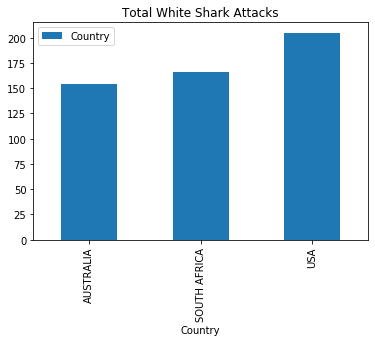

In [41]:
output_total.plot(kind='bar',title="Total White Shark Attacks")

Text(0.5, 1.02, 'Total White Shark Attacks')

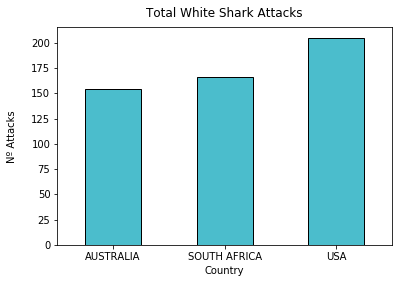

In [106]:
filtered.groupby(['Country']).size().plot(kind='bar',stacked=True, rot=0, 
                                          title="Total White Shark Attacks", color="#4bbdcc")

plt.ylabel("Nº Attacks", labelpad=14)
plt.title("Total White Shark Attacks", y=1.02)


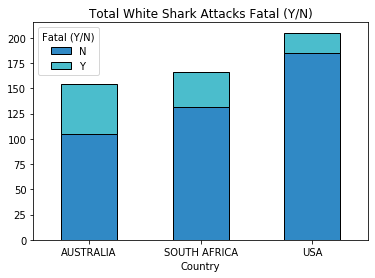

In [96]:
filtered.groupby(['Country','Fatal (Y/N)']).size().unstack().plot(kind='bar',
                                                                  stacked=True, rot=0, title="Total White Shark Attacks Fatal (Y/N)", color=["#3089c5","#4bbdcc"])


In [115]:
output_fatal = filtered.groupby(["Country", "Fatal (Y/N)"]).agg({"Country":"count"})
output_fatal.append(output_total.agg(['sum']))

,Country
"(AUSTRALIA, N)",105
"(AUSTRALIA, Y)",49
"(SOUTH AFRICA, N)",131
"(SOUTH AFRICA, Y)",35
"(USA, N)",185
"(USA, Y)",20
sum,525


In [24]:
filtered["Country"].value_counts().head()


USA             205
SOUTH AFRICA    166
AUSTRALIA       154
Name: Country, dtype: int64

In [25]:
filtered["Fatal (Y/N)"].value_counts().head()


N    421
Y    104
Name: Fatal (Y/N), dtype: int64

In [26]:
filtered["Date"].value_counts().head()


KeyError: 'Date'

In [ ]:
output = filtered.groupby(["Country"]).agg({"Country":"count"})
output


In [ ]:
output = filtered.groupby(["Country", "Fatal (Y/N)"]).agg({"Country":"count"})
output.T


In [ ]:
output.plot(kind='bar',stacked=True,title="The title of my graph")


In [ ]:

final1 = filtered.groupby(["Country"]).agg({"Fatal (Y/N)":"count"})
final1
final1[["Fatal (Y/N)"]].plot(kind='bar')


In [ ]:
final1.plot(kind='bar', stacked=True)
plt.title("Total Attacks")
plt.xlabel("Country")
plt.ylabel("Number attacks")

In [ ]:
df = pd.DataFrame({'lab':['Australia', 'South Africa', 'USA'], 'val':[116, 126, 171]})
ax = df.plot.bar(x='lab', y='val', rot=0)

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

final.plot.bar(stacked=True);

In [ ]:
df = pd.DataFrame(3 * np.random.rand(3,2), index=['Australia', 'South Africa', 'USA'])
df.plot.pie(subplots=True, figsize=(8, 4))

In [ ]:
#data_updated = data.replace(to_replace ='\d{2}[h]\d{2}', value = '\d\d:\d\d', regex = True) 
data_updated = re.sub('\d{2}[h]\d{2}','\d{2}:\d{2}', data) 

In [ ]:
#data_updated = data.replace('(h\d)',':d',regex=True) 
data['Time'] = data['Time'].astype(str).str.replace('h',':')
data.head(10)
#\
#data.replace

In [ ]:
#https://www.datacamp.com/community/tutorials/categorical-data


In [ ]:
#data_updated = data.replace(to_replace ='\d{2}[h]\d{2}', value = 'Hola', regex = True) 
#data_updated = data.replace('(h\d)',':d',regex=True) 
data['Time'] = data['Time'].astype(str).str.replace('h',':')
data.head(10)
#\
#data.replace

In [ ]:
#data['Time'] = pd.to_datetime(data['Time'],format= '%H:%M', errors='coerce').dt.time
import datetime
time = datetime.fromtimestamp(data["Time"])
d = time.strftime("%H:%M:%S")
